In [1]:
import importlib
import functions
import numpy as np
import ga_functions
import pso_functions
import seaborn as sns
import neural_network as nn
from datetime import datetime

2022-03-28 08:31:07.644233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 08:31:07.644260: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
sns.set_theme()

In [3]:
X_iris, Y_iris = functions.load_dataset('iris')
X_wine, Y_wine = functions.load_dataset('wine')
X_breast, Y_breast = functions.load_dataset('breast')

# baseline

In [4]:
nn_args_iris = [X_iris, Y_iris, 32]
nn_args_wine = [X_wine, Y_wine, 32]
nn_args_breast = [X_breast, Y_breast, 32]

## Iris

In [15]:
start_time = datetime.now()
nn_iris_metrics = functions.run_nn_experiments(5, exp_name='iris_baseline',  args=nn_args_iris)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp  0
Running exp  1
Running exp  2
Running exp  3
Running exp  4
Duration: 0:01:29.805155


## Wine

In [5]:
start_time = datetime.now()
nn_wine_metrics = functions.run_nn_experiments(5, exp_name='wine_baseline',  args=nn_args_wine)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp  0


2022-03-28 08:33:06.785499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-28 08:33:06.785540: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 08:33:06.785567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian): /proc/driver/nvidia/version does not exist
2022-03-28 08:33:06.825023: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Running exp  1
Running exp  2
Running exp  3
Running exp  4
Duration: 0:01:02.730497


## Breast Cancer

In [40]:
start_time = datetime.now()
nn_breast_metrics = functions.run_nn_experiments(5, exp_name='breast_baseline',  args=nn_args_breast)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp  0
Running exp  1
Running exp  2
Running exp  3
Running exp  4
Duration: 0:03:21.746010


In [8]:
out_iris = len(np.unique(Y_iris))
layers_iris = [nn.Layer(X_iris.shape[1], 4, 'relu'), nn.Layer(4, out_iris, 'softmax')]
out_wine = len(np.unique(Y_wine))
layers_wine = [nn.Layer(X_wine.shape[1], 4, 'relu'), nn.Layer(4, out_wine, 'softmax')]
out_breast = len(np.unique(Y_breast))
layers_breast = [nn.Layer(X_breast.shape[1], 4, 'relu'), nn.Layer(4, out_breast, 'softmax')]

# PSO

In [6]:
pso_args_iris = [X_iris, Y_iris, 150, 100, 0.9, 0.25, 0.25]
pso_args_wine = [X_wine, Y_wine, 150, 100, 0.9, 0.25, 0.25]
pso_args_breast = [X_breast, Y_breast, 150, 100, 0.9, 0.25, 0.25]

## Iris

In [19]:
start_time = datetime.now()
pso_iris_metrics = functions.run_pso_experiments(pso_functions.PSO_NN, 5, layers_iris, 'iris_pso', args=pso_args_iris, norm=False)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:03:27.678298


## Wine

In [9]:
start_time = datetime.now()
pso_wine_metrics = functions.run_pso_experiments(pso_functions.PSO_NN, 5, layers_wine, 'wine_pso', args=pso_args_wine, norm=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:02:01.626984


## Breast Cancer

In [46]:
start_time = datetime.now()
pso_breast_metrics = functions.run_pso_experiments(pso_functions.PSO_NN, 5, layers_breast, 'breast_pso', args=pso_args_breast, norm=True)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:08:32.892823


# GA

In [10]:
ga_args_iris = [X_iris, Y_iris, 150, 50, 0.09, 0.25, 0, 'cce']
ga_args_wine = [X_wine, Y_wine, 150, 50, 0.09, 0.25, 0, 'cce']
ga_args_breast = [X_breast, Y_breast, 150, 50, 0.09, 0.25, 0, 'cce']

## Iris

In [21]:
start_time = datetime.now()
ga_iris_metrics = functions.run_ga_experiments(ga_functions.GA_NN, 5, layers_iris, 'iris_ga', ga_args_iris)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:01:50.050982


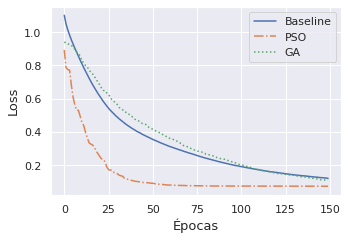

In [28]:
dict_iris = {
    'Baseline':np.mean(nn_iris_metrics[0], axis=0), 
    'PSO':np.mean(pso_iris_metrics[0], axis=0),
    'GA':np.mean(ga_iris_metrics[0], axis=0),
    }
functions.plot_comparacao(dict_iris, 150,'Loss', figname="iris_loss", savefig=True)

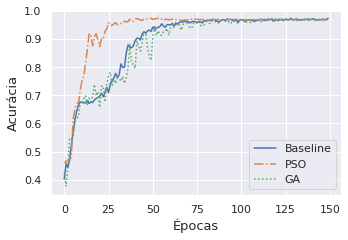

In [55]:
dict_iris_acc = {
    'Baseline':np.mean(nn_iris_metrics[2], axis=0), 
    'PSO':np.mean(pso_iris_metrics[2], axis=0),
    'GA':np.mean(ga_iris_metrics[2], axis=0),
    }
functions.plot_comparacao(dict_iris_acc, 150,'Acurácia', figname="iris_acc", savefig=True)

## Wine

In [11]:
start_time = datetime.now()
ga_wine_metrics = functions.run_ga_experiments(ga_functions.GA_NN, 5, layers_wine, 'wine_ga', ga_args_wine)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:00:59.526929


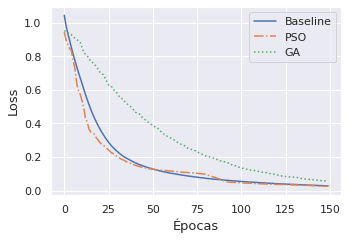

In [12]:
dict_wine_loss = {
    'Baseline':np.mean(nn_wine_metrics[0], axis=0), 
    'PSO':np.mean(pso_wine_metrics[0], axis=0),
    'GA':np.mean(ga_wine_metrics[0], axis=0),
    }
functions.plot_comparacao(dict_wine_loss, 150, 'Loss', figname="wine_loss", savefig=True)

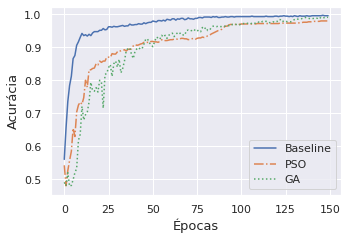

In [13]:
dict_wine_acc = {
    'Baseline':np.mean(nn_wine_metrics[2], axis=0), 
    'PSO':np.mean(pso_wine_metrics[2], axis=0),
    'GA':np.mean(ga_wine_metrics[2], axis=0),
}
functions.plot_comparacao(dict_wine_acc, 150, 'Acurácia', figname="wine_acc", savefig=True)

## Breast Cancer

In [50]:
start_time = datetime.now()
ga_breast_metrics = functions.run_ga_experiments(ga_functions.GA_NN, 5, layers_breast, 'breast_ga', ga_args_breast)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Running exp 0
Running exp 1
Running exp 2
Running exp 3
Running exp 4
Duration: 0:04:49.196565


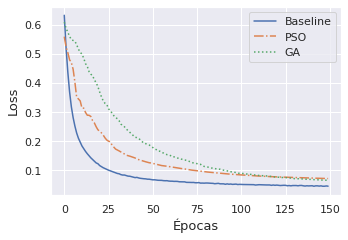

In [54]:
dict_breast_loss = {
    'Baseline':np.mean(nn_breast_metrics[0], axis=0), 
    'PSO':np.mean(pso_breast_metrics[0], axis=0),
    'GA':np.mean(ga_breast_metrics[0], axis=0),
    }
functions.plot_comparacao(dict_breast_loss, 150, 'Loss', figname="breast_loss", savefig=True)

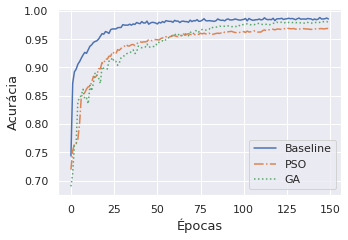

In [53]:
dict_breast_acc = {
    'Baseline':np.mean(nn_breast_metrics[2], axis=0), 
    'PSO':np.mean(pso_breast_metrics[2], axis=0),
    'GA':np.mean(ga_breast_metrics[2], axis=0),
    }
functions.plot_comparacao(dict_breast_acc, 150, 'Acurácia', figname="breast_acc", savefig=True)